## Tensorflow Estimator Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Import Dataset
diabetes = pd.read_csv('dataset/pima-indians-diabetes.csv')

In [3]:
# Check Dataset
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
# Normalize the Data
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [8]:
# Normalize the Values in selected Columns using Pandas
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
# Create Feature Columns for Estimator
# Since we have a lot of features in the data, we make the feature column for each one of these individually.
# Features: 'Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree', 'Age'
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glucose_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
# Make Categorical Feature Columns for the Categorical Data
# i.e. Class and Group in Dataset

# The feature Columns for the Categorical data can be made using two techniques:
# 1. Vocabulary List
# 2. Hash Bucket

# 1. Using Vocabulary List:
# Pass in the token 'Group' and since Group can only be A, B, C or D, So
# pass those in as a List
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
# If there are a lot number of Groups ex. Countries and you don't want to type out all of them,
# Use Hash Bucketing technique for "Categorical Feature Columns".
# In this, provide the 'Group' Token and the hash bucket size is the max amount of groups that we believe will be in that column.
# This line automatically generated the vocabulary List in Background.

#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

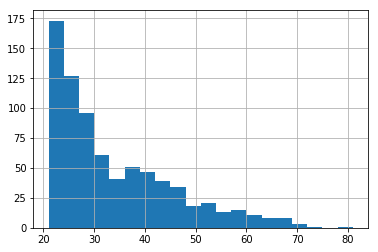

In [13]:
# Plot Distribution of Ages
diabetes['Age'].hist(bins=20)

In [14]:
# Take continuous Value and Bucket it
# boundaries: Takes the values and buckets it into the range. ex. 20-30, 30-40, 40-50 and so on.
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
# Collect Together all the Feature Columns
feat_cols = [num_preg, glucose_conc, blood_pressure, triceps, insulin, bmi, pedigree, assigned_group, age_bucket]

In [18]:
# Features
x_data = diabetes.drop('Class',axis = 1)

In [19]:
# Labels
labels = diabetes['Class']

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state= 101)

In [25]:
# Define Input Function
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train,y=y_train, batch_size=10, num_epochs=1000,shuffle=True)

In [26]:
# Define the Eastimator Model
# Linear Classifier with number of Classes = 2
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmpuacow481', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmpuacow481', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


In [27]:
# Train the Model
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt.


INFO:tensorflow:loss = 6.93147, step = 1


INFO:tensorflow:loss = 6.93147, step = 1


INFO:tensorflow:global_step/sec: 279.261


INFO:tensorflow:global_step/sec: 279.261


INFO:tensorflow:loss = 4.42842, step = 101 (0.365 sec)


INFO:tensorflow:loss = 4.42842, step = 101 (0.365 sec)


INFO:tensorflow:global_step/sec: 326.159


INFO:tensorflow:global_step/sec: 326.159


INFO:tensorflow:loss = 4.98465, step = 201 (0.311 sec)


INFO:tensorflow:loss = 4.98465, step = 201 (0.311 sec)


INFO:tensorflow:global_step/sec: 307.291


INFO:tensorflow:global_step/sec: 307.291


INFO:tensorflow:loss = 4.90913, step = 301 (0.319 sec)


INFO:tensorflow:loss = 4.90913, step = 301 (0.319 sec)


INFO:tensorflow:global_step/sec: 306.202


INFO:tensorflow:global_step/sec: 306.202


INFO:tensorflow:loss = 6.18062, step = 401 (0.330 sec)


INFO:tensorflow:loss = 6.18062, step = 401 (0.330 sec)


INFO:tensorflow:global_step/sec: 236.791


INFO:tensorflow:global_step/sec: 236.791


INFO:tensorflow:loss = 8.25846, step = 501 (0.418 sec)


INFO:tensorflow:loss = 8.25846, step = 501 (0.418 sec)


INFO:tensorflow:global_step/sec: 325.952


INFO:tensorflow:global_step/sec: 325.952


INFO:tensorflow:loss = 4.49088, step = 601 (0.309 sec)


INFO:tensorflow:loss = 4.49088, step = 601 (0.309 sec)


INFO:tensorflow:global_step/sec: 334.032


INFO:tensorflow:global_step/sec: 334.032


INFO:tensorflow:loss = 4.36606, step = 701 (0.300 sec)


INFO:tensorflow:loss = 4.36606, step = 701 (0.300 sec)


INFO:tensorflow:global_step/sec: 262.988


INFO:tensorflow:global_step/sec: 262.988


INFO:tensorflow:loss = 4.08458, step = 801 (0.380 sec)


INFO:tensorflow:loss = 4.08458, step = 801 (0.380 sec)


INFO:tensorflow:global_step/sec: 296.479


INFO:tensorflow:global_step/sec: 296.479


INFO:tensorflow:loss = 4.732, step = 901 (0.336 sec)


INFO:tensorflow:loss = 4.732, step = 901 (0.336 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt.


INFO:tensorflow:Loss for final step: 4.8018.


INFO:tensorflow:Loss for final step: 4.8018.


In [28]:
# Evaluate the Model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [29]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-27-21:44:14


INFO:tensorflow:Starting evaluation at 2017-12-27-21:44:14


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2017-12-27-21:44:16


INFO:tensorflow:Finished evaluation at 2017-12-27-21:44:16


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.727273, accuracy_baseline = 0.649351, auc = 0.80214, auc_precision_recall = 0.648512, average_loss = 0.523661, global_step = 1000, label/mean = 0.350649, loss = 5.04024, prediction/mean = 0.344017


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.727273, accuracy_baseline = 0.649351, auc = 0.80214, auc_precision_recall = 0.648512, average_loss = 0.523661, global_step = 1000, label/mean = 0.350649, loss = 5.04024, prediction/mean = 0.344017


In [33]:
# Predictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [34]:
predictions = model.predict(pred_input_func)

In [35]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmpuacow481\model.ckpt-1000


In [36]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.48533508], dtype=float32),
  'logits': array([-0.05867654], dtype=float32),
  'probabilities': array([ 0.51466495,  0.48533511], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.598342], dtype=float32),
  'logits': array([ 0.39856148], dtype=float32),
  'probabilities': array([ 0.40165803,  0.598342  ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36082873], dtype=float32),
  'logits': array([-0.57176918], dtype=float32),
  'probabilities': array([ 0.6391713 ,  0.36082867], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31054294], dtype=float32),
  'logits': array([-0.79758227], dtype=float32),
  'probabilities': array([ 0.68945712,  0.31054294], dtype=float

## Dense Neural Network Classifier

In [37]:
# DNN Classifier Model
# hidden_units: Neurons per layer.
# ex. [10,10,10]: 3 hidden Layers with 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmpee6pxg0z', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmpee6pxg0z', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


In [39]:
# Pass Vocabulary List to Embedded Cols
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [40]:
# Feature Columns
feat_cols = [num_preg, glucose_conc, blood_pressure, triceps, insulin, bmi, pedigree, embedded_group_col, age_bucket]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train, y= y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmp1v_6n1_j', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmp1v_6n1_j', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None}


In [44]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt.


INFO:tensorflow:loss = 7.7282, step = 1


INFO:tensorflow:loss = 7.7282, step = 1


INFO:tensorflow:global_step/sec: 209.935


INFO:tensorflow:global_step/sec: 209.935


INFO:tensorflow:loss = 3.94571, step = 101 (0.484 sec)


INFO:tensorflow:loss = 3.94571, step = 101 (0.484 sec)


INFO:tensorflow:global_step/sec: 275.286


INFO:tensorflow:global_step/sec: 275.286


INFO:tensorflow:loss = 6.26834, step = 201 (0.373 sec)


INFO:tensorflow:loss = 6.26834, step = 201 (0.373 sec)


INFO:tensorflow:global_step/sec: 237.926


INFO:tensorflow:global_step/sec: 237.926


INFO:tensorflow:loss = 6.25217, step = 301 (0.409 sec)


INFO:tensorflow:loss = 6.25217, step = 301 (0.409 sec)


INFO:tensorflow:global_step/sec: 249.51


INFO:tensorflow:global_step/sec: 249.51


INFO:tensorflow:loss = 5.05405, step = 401 (0.404 sec)


INFO:tensorflow:loss = 5.05405, step = 401 (0.404 sec)


INFO:tensorflow:global_step/sec: 249.822


INFO:tensorflow:global_step/sec: 249.822


INFO:tensorflow:loss = 4.4499, step = 501 (0.398 sec)


INFO:tensorflow:loss = 4.4499, step = 501 (0.398 sec)


INFO:tensorflow:global_step/sec: 281.49


INFO:tensorflow:global_step/sec: 281.49


INFO:tensorflow:loss = 4.64169, step = 601 (0.358 sec)


INFO:tensorflow:loss = 4.64169, step = 601 (0.358 sec)


INFO:tensorflow:global_step/sec: 227.628


INFO:tensorflow:global_step/sec: 227.628


INFO:tensorflow:loss = 6.13455, step = 701 (0.436 sec)


INFO:tensorflow:loss = 6.13455, step = 701 (0.436 sec)


INFO:tensorflow:global_step/sec: 280.699


INFO:tensorflow:global_step/sec: 280.699


INFO:tensorflow:loss = 3.13435, step = 801 (0.359 sec)


INFO:tensorflow:loss = 3.13435, step = 801 (0.359 sec)


INFO:tensorflow:global_step/sec: 219.142


INFO:tensorflow:global_step/sec: 219.142


INFO:tensorflow:loss = 7.89199, step = 901 (0.463 sec)


INFO:tensorflow:loss = 7.89199, step = 901 (0.463 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt.


INFO:tensorflow:Loss for final step: 5.23004.


INFO:tensorflow:Loss for final step: 5.23004.


In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [46]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-27-22:04:00


INFO:tensorflow:Starting evaluation at 2017-12-27-22:04:00


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp1v_6n1_j\model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2017-12-27-22:04:01


INFO:tensorflow:Finished evaluation at 2017-12-27-22:04:01


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.835679, auc_precision_recall = 0.70461, average_loss = 0.481773, global_step = 1000, label/mean = 0.350649, loss = 4.63706, prediction/mean = 0.350073


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.835679, auc_precision_recall = 0.70461, average_loss = 0.481773, global_step = 1000, label/mean = 0.350649, loss = 4.63706, prediction/mean = 0.350073


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83567905,
 'auc_precision_recall': 0.70460963,
 'average_loss': 0.48177296,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6370645,
 'prediction/mean': 0.35007262}